In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import geopandas as gpd

In [ ]:
# Shapefile 읽기
shapefile_path = '/content/drive/MyDrive/유성구 데이터/법정동인구수경계/bnd_oa_25040_2023_2Q.shp'
gdf = gpd.read_file(shapefile_path)

# 좌표계 확인
print(gdf.crs)

# 좌표계가 EPSG:4326이 아니라면 변환
if gdf.crs != 'EPSG:4326':
    gdf = gdf.to_crs('EPSG:4326')

PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 2000",DATUM["Geocentric_datum_of_Korea",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4737"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","5179"]]


In [ ]:
bm1_gdf = gdf[gdf['ADM_CD']=='25040640']
bm2_gdf = gdf[gdf['ADM_CD']=='25040710']

In [ ]:
bm1_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)
bm2_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)

<ipython-input-5-141cb7af6826>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bm1_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)
<ipython-input-5-141cb7af6826>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bm2_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)


In [ ]:
bm1_gdf['집계구번호'] = bm1_gdf['집계구번호'].astype(int)
bm2_gdf['집계구번호'] = bm2_gdf['집계구번호'].astype(int)
display(bm1_gdf.info())
display(bm2_gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 56 entries, 372 to 439
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BASE_DATE  56 non-null     object  
 1   ADM_CD     56 non-null     object  
 2   집계구번호      56 non-null     int64   
 3   geometry   56 non-null     geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 2.2+ KB


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


None

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 55 entries, 669 to 734
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BASE_DATE  55 non-null     object  
 1   ADM_CD     55 non-null     object  
 2   집계구번호      55 non-null     int64   
 3   geometry   55 non-null     geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 2.1+ KB


None

In [ ]:
bm_jdf = pd.read_excel('/content/drive/MyDrive/유성구 데이터/봉명동_온천1동_인구수.xls')
bm_wdf = pd.read_excel('/content/drive/MyDrive/유성구 데이터/봉명동_원신흥동_인구수.xls')

In [ ]:
bm_jdf['집계구번호'].fillna(0, inplace=True)
bm_jdf['집계구번호'] = bm_jdf['집계구번호'].astype(int)
bm_jdf

,순위,항목,집계구번호,값,비율(%)
0,1.0,온천1동_1,25040640011301,788.0,3.0
1,2.0,온천1동_2,25040640010101,765.0,2.9
2,3.0,온천1동_3,25040640043501,745.0,2.8
3,4.0,온천1동_4,25040640040203,679.0,2.6
4,5.0,온천1동_5,25040640010901,670.0,2.5
5,6.0,온천1동_6,25040640010013,611.0,2.3
6,7.0,온천1동_7,25040640010021,608.0,2.3
7,8.0,온천1동_8,25040640040006,606.0,2.3
8,9.0,온천1동_9,25040640020001,601.0,2.3
9,10.0,온천1동_10,25040640010011,597.0,2.3


In [ ]:
bm_wdf['집계구번호'].fillna(0, inplace=True)
bm_wdf['집계구번호'] = bm_wdf['집계구번호'].astype(int)
bm_wdf

,순위,항목,집계구번호,값,비율(%)
0,1.0,원신흥동_1,25040710040001,611.0,2.3
1,2.0,원신흥동_2,25040710030202,608.0,2.3
2,3.0,원신흥동_3,25040710010101,603.0,2.3
3,4.0,원신흥동_4,25040710010203,603.0,2.3
4,5.0,원신흥동_5,25040710020102,596.0,2.2
5,6.0,원신흥동_6,25040710030304,594.0,2.2
6,7.0,원신흥동_7,25040710030101,592.0,2.2
7,8.0,원신흥동_8,25040710020104,584.0,2.2
8,9.0,원신흥동_9,25040710030103,582.0,2.2
9,10.0,원신흥동_10,25040710050202,576.0,2.2


In [ ]:
bm_jdf = bm_jdf[:-1]
bm_wdf = bm_wdf[:-2]
display(bm_jdf)
display(bm_wdf)

,순위,항목,집계구번호,값,비율(%)
0,1.0,온천1동_1,25040640011301,788.0,3.0
1,2.0,온천1동_2,25040640010101,765.0,2.9
2,3.0,온천1동_3,25040640043501,745.0,2.8
3,4.0,온천1동_4,25040640040203,679.0,2.6
4,5.0,온천1동_5,25040640010901,670.0,2.5
5,6.0,온천1동_6,25040640010013,611.0,2.3
6,7.0,온천1동_7,25040640010021,608.0,2.3
7,8.0,온천1동_8,25040640040006,606.0,2.3
8,9.0,온천1동_9,25040640020001,601.0,2.3
9,10.0,온천1동_10,25040640010011,597.0,2.3


,순위,항목,집계구번호,값,비율(%)
0,1.0,원신흥동_1,25040710040001,611.0,2.3
1,2.0,원신흥동_2,25040710030202,608.0,2.3
2,3.0,원신흥동_3,25040710010101,603.0,2.3
3,4.0,원신흥동_4,25040710010203,603.0,2.3
4,5.0,원신흥동_5,25040710020102,596.0,2.2
5,6.0,원신흥동_6,25040710030304,594.0,2.2
6,7.0,원신흥동_7,25040710030101,592.0,2.2
7,8.0,원신흥동_8,25040710020104,584.0,2.2
8,9.0,원신흥동_9,25040710030103,582.0,2.2
9,10.0,원신흥동_10,25040710050202,576.0,2.2


In [ ]:
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
bm_jdf = bm_jdf.sort_values('집계구번호')
bm_wdf = bm_wdf.sort_values('집계구번호')
display(bm_jdf)
display(bm_wdf)

,순위,항목,집계구번호,값,비율(%)
41,42.0,온천1동_42,25040640010001,393.0,1.5
40,41.0,온천1동_41,25040640010002,394.0,1.5
29,30.0,온천1동_30,25040640010003,455.0,1.7
28,29.0,온천1동_29,25040640010004,458.0,1.7
21,22.0,온천1동_22,25040640010005,498.0,1.9
14,15.0,온천1동_15,25040640010006,579.0,2.2
32,33.0,온천1동_33,25040640010007,432.0,1.6
35,36.0,온천1동_36,25040640010008,411.0,1.6
33,34.0,온천1동_34,25040640010009,422.0,1.6
15,16.0,온천1동_16,25040640010010,577.0,2.2


,순위,항목,집계구번호,값,비율(%)
2,3.0,원신흥동_3,25040710010101,603.0,2.3
41,42.0,원신흥동_42,25040710010102,421.0,1.6
25,26.0,원신흥동_26,25040710010103,504.0,1.9
35,36.0,원신흥동_36,25040710010104,462.0,1.7
22,23.0,원신흥동_23,25040710010105,526.0,2.0
23,24.0,원신흥동_24,25040710010201,525.0,2.0
10,11.0,원신흥동_11,25040710010202,573.0,2.2
3,4.0,원신흥동_4,25040710010203,603.0,2.3
36,37.0,원신흥동_37,25040710010204,455.0,1.7
26,27.0,원신흥동_27,25040710010205,501.0,1.9


In [ ]:
bm1_gdf = bm1_gdf.sort_values('집계구번호')
bm2_gdf = bm2_gdf.sort_values('집계구번호')

In [ ]:
display(bm1_gdf)
display(bm2_gdf)

,BASE_DATE,ADM_CD,집계구번호,geometry
396,20230701,25040640,25040640010001,"POLYGON ((127.34263 36.35972, 127.34329 36.359..."
400,20230701,25040640,25040640010002,"POLYGON ((127.34211 36.35560, 127.34207 36.355..."
398,20230701,25040640,25040640010003,"POLYGON ((127.33392 36.35228, 127.33391 36.352..."
390,20230701,25040640,25040640010004,"POLYGON ((127.34154 36.35296, 127.34147 36.352..."
389,20230701,25040640,25040640010005,"POLYGON ((127.33512 36.35314, 127.33511 36.353..."
392,20230701,25040640,25040640010006,"POLYGON ((127.33247 36.34879, 127.33245 36.348..."
391,20230701,25040640,25040640010007,"POLYGON ((127.33766 36.35374, 127.33767 36.353..."
386,20230701,25040640,25040640010008,"POLYGON ((127.33835 36.34978, 127.33836 36.349..."
385,20230701,25040640,25040640010009,"POLYGON ((127.33503 36.35646, 127.33537 36.356..."
381,20230701,25040640,25040640010010,"POLYGON ((127.33873 36.35126, 127.33884 36.351..."


,BASE_DATE,ADM_CD,집계구번호,geometry
684,20230701,25040710,25040710010001,"POLYGON ((127.34487 36.35002, 127.34544 36.350..."
685,20230701,25040710,25040710010002,"POLYGON ((127.34233 36.35317, 127.34238 36.353..."
680,20230701,25040710,25040710010101,"POLYGON ((127.34443 36.35112, 127.34443 36.351..."
682,20230701,25040710,25040710010102,"POLYGON ((127.34141 36.34890, 127.34141 36.348..."
681,20230701,25040710,25040710010103,"POLYGON ((127.34310 36.35018, 127.34307 36.350..."
679,20230701,25040710,25040710010104,"POLYGON ((127.34310 36.35112, 127.34310 36.350..."
669,20230701,25040710,25040710010105,"POLYGON ((127.34318 36.35184, 127.34318 36.351..."
690,20230701,25040710,25040710010201,"POLYGON ((127.34809 36.35014, 127.34807 36.350..."
687,20230701,25040710,25040710010202,"POLYGON ((127.34797 36.34850, 127.34797 36.348..."
686,20230701,25040710,25040710010203,"POLYGON ((127.34681 36.35037, 127.34681 36.350..."


In [ ]:
bm1_gdf['집계구번호'] = bm1_gdf['집계구번호'].astype(int)
bm2_gdf['집계구번호'] = bm2_gdf['집계구번호'].astype(int)

In [ ]:
# '집계구번호' 열을 기준으로 병합
bm1_new_gdf = bm1_gdf.merge(bm_jdf[['집계구번호', '값', '비율(%)']], on='집계구번호', how='left')
bm2_new_gdf = bm2_gdf.merge(bm_wdf[['집계구번호', '값', '비율(%)']], on='집계구번호', how='left')

display(bm1_new_gdf)
display(bm2_new_gdf)

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%)
0,20230701,25040640,25040640010001,"POLYGON ((127.34263 36.35972, 127.34329 36.359...",393.0,1.5
1,20230701,25040640,25040640010002,"POLYGON ((127.34211 36.35560, 127.34207 36.355...",394.0,1.5
2,20230701,25040640,25040640010003,"POLYGON ((127.33392 36.35228, 127.33391 36.352...",455.0,1.7
3,20230701,25040640,25040640010004,"POLYGON ((127.34154 36.35296, 127.34147 36.352...",458.0,1.7
4,20230701,25040640,25040640010005,"POLYGON ((127.33512 36.35314, 127.33511 36.353...",498.0,1.9
5,20230701,25040640,25040640010006,"POLYGON ((127.33247 36.34879, 127.33245 36.348...",579.0,2.2
6,20230701,25040640,25040640010007,"POLYGON ((127.33766 36.35374, 127.33767 36.353...",432.0,1.6
7,20230701,25040640,25040640010008,"POLYGON ((127.33835 36.34978, 127.33836 36.349...",411.0,1.6
8,20230701,25040640,25040640010009,"POLYGON ((127.33503 36.35646, 127.33537 36.356...",422.0,1.6
9,20230701,25040640,25040640010010,"POLYGON ((127.33873 36.35126, 127.33884 36.351...",577.0,2.2


,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%)
0,20230701,25040710,25040710010001,"POLYGON ((127.34487 36.35002, 127.34544 36.350...",NaN,NaN
1,20230701,25040710,25040710010002,"POLYGON ((127.34233 36.35317, 127.34238 36.353...",NaN,NaN
2,20230701,25040710,25040710010101,"POLYGON ((127.34443 36.35112, 127.34443 36.351...",603.0,2.3
3,20230701,25040710,25040710010102,"POLYGON ((127.34141 36.34890, 127.34141 36.348...",421.0,1.6
4,20230701,25040710,25040710010103,"POLYGON ((127.34310 36.35018, 127.34307 36.350...",504.0,1.9
5,20230701,25040710,25040710010104,"POLYGON ((127.34310 36.35112, 127.34310 36.350...",462.0,1.7
6,20230701,25040710,25040710010105,"POLYGON ((127.34318 36.35184, 127.34318 36.351...",526.0,2.0
7,20230701,25040710,25040710010201,"POLYGON ((127.34809 36.35014, 127.34807 36.350...",525.0,2.0
8,20230701,25040710,25040710010202,"POLYGON ((127.34797 36.34850, 127.34797 36.348...",573.0,2.2
9,20230701,25040710,25040710010203,"POLYGON ((127.34681 36.35037, 127.34681 36.350...",603.0,2.3


In [ ]:
bm1_new_gdf['일별쓰레기배출량'] = bm1_new_gdf['값'] * 0.93
bm2_new_gdf['일별쓰레기배출량'] = bm2_new_gdf['값'] * 0.93
display(bm1_new_gdf)
display(bm2_new_gdf)

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040640,25040640010001,"POLYGON ((127.34263 36.35972, 127.34329 36.359...",393.0,1.5,365.49
1,20230701,25040640,25040640010002,"POLYGON ((127.34211 36.35560, 127.34207 36.355...",394.0,1.5,366.42
2,20230701,25040640,25040640010003,"POLYGON ((127.33392 36.35228, 127.33391 36.352...",455.0,1.7,423.15
3,20230701,25040640,25040640010004,"POLYGON ((127.34154 36.35296, 127.34147 36.352...",458.0,1.7,425.94
4,20230701,25040640,25040640010005,"POLYGON ((127.33512 36.35314, 127.33511 36.353...",498.0,1.9,463.14
5,20230701,25040640,25040640010006,"POLYGON ((127.33247 36.34879, 127.33245 36.348...",579.0,2.2,538.47
6,20230701,25040640,25040640010007,"POLYGON ((127.33766 36.35374, 127.33767 36.353...",432.0,1.6,401.76
7,20230701,25040640,25040640010008,"POLYGON ((127.33835 36.34978, 127.33836 36.349...",411.0,1.6,382.23
8,20230701,25040640,25040640010009,"POLYGON ((127.33503 36.35646, 127.33537 36.356...",422.0,1.6,392.46
9,20230701,25040640,25040640010010,"POLYGON ((127.33873 36.35126, 127.33884 36.351...",577.0,2.2,536.61


,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040710,25040710010001,"POLYGON ((127.34487 36.35002, 127.34544 36.350...",NaN,NaN,NaN
1,20230701,25040710,25040710010002,"POLYGON ((127.34233 36.35317, 127.34238 36.353...",NaN,NaN,NaN
2,20230701,25040710,25040710010101,"POLYGON ((127.34443 36.35112, 127.34443 36.351...",603.0,2.3,560.79
3,20230701,25040710,25040710010102,"POLYGON ((127.34141 36.34890, 127.34141 36.348...",421.0,1.6,391.53
4,20230701,25040710,25040710010103,"POLYGON ((127.34310 36.35018, 127.34307 36.350...",504.0,1.9,468.72
5,20230701,25040710,25040710010104,"POLYGON ((127.34310 36.35112, 127.34310 36.350...",462.0,1.7,429.66
6,20230701,25040710,25040710010105,"POLYGON ((127.34318 36.35184, 127.34318 36.351...",526.0,2.0,489.18
7,20230701,25040710,25040710010201,"POLYGON ((127.34809 36.35014, 127.34807 36.350...",525.0,2.0,488.25
8,20230701,25040710,25040710010202,"POLYGON ((127.34797 36.34850, 127.34797 36.348...",573.0,2.2,532.89
9,20230701,25040710,25040710010203,"POLYGON ((127.34681 36.35037, 127.34681 36.350...",603.0,2.3,560.79


In [ ]:
bm1_new_gdf['일별쓰레기배출량'].fillna(0, inplace=True)
bm2_new_gdf['일별쓰레기배출량'].fillna(0, inplace=True)
display(bm1_new_gdf)
display(bm2_new_gdf)

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040640,25040640010001,"POLYGON ((127.34263 36.35972, 127.34329 36.359...",393.0,1.5,365.49
1,20230701,25040640,25040640010002,"POLYGON ((127.34211 36.35560, 127.34207 36.355...",394.0,1.5,366.42
2,20230701,25040640,25040640010003,"POLYGON ((127.33392 36.35228, 127.33391 36.352...",455.0,1.7,423.15
3,20230701,25040640,25040640010004,"POLYGON ((127.34154 36.35296, 127.34147 36.352...",458.0,1.7,425.94
4,20230701,25040640,25040640010005,"POLYGON ((127.33512 36.35314, 127.33511 36.353...",498.0,1.9,463.14
5,20230701,25040640,25040640010006,"POLYGON ((127.33247 36.34879, 127.33245 36.348...",579.0,2.2,538.47
6,20230701,25040640,25040640010007,"POLYGON ((127.33766 36.35374, 127.33767 36.353...",432.0,1.6,401.76
7,20230701,25040640,25040640010008,"POLYGON ((127.33835 36.34978, 127.33836 36.349...",411.0,1.6,382.23
8,20230701,25040640,25040640010009,"POLYGON ((127.33503 36.35646, 127.33537 36.356...",422.0,1.6,392.46
9,20230701,25040640,25040640010010,"POLYGON ((127.33873 36.35126, 127.33884 36.351...",577.0,2.2,536.61


,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040710,25040710010001,"POLYGON ((127.34487 36.35002, 127.34544 36.350...",NaN,NaN,0.00
1,20230701,25040710,25040710010002,"POLYGON ((127.34233 36.35317, 127.34238 36.353...",NaN,NaN,0.00
2,20230701,25040710,25040710010101,"POLYGON ((127.34443 36.35112, 127.34443 36.351...",603.0,2.3,560.79
3,20230701,25040710,25040710010102,"POLYGON ((127.34141 36.34890, 127.34141 36.348...",421.0,1.6,391.53
4,20230701,25040710,25040710010103,"POLYGON ((127.34310 36.35018, 127.34307 36.350...",504.0,1.9,468.72
5,20230701,25040710,25040710010104,"POLYGON ((127.34310 36.35112, 127.34310 36.350...",462.0,1.7,429.66
6,20230701,25040710,25040710010105,"POLYGON ((127.34318 36.35184, 127.34318 36.351...",526.0,2.0,489.18
7,20230701,25040710,25040710010201,"POLYGON ((127.34809 36.35014, 127.34807 36.350...",525.0,2.0,488.25
8,20230701,25040710,25040710010202,"POLYGON ((127.34797 36.34850, 127.34797 36.348...",573.0,2.2,532.89
9,20230701,25040710,25040710010203,"POLYGON ((127.34681 36.35037, 127.34681 36.350...",603.0,2.3,560.79


In [ ]:
# 문자열 리스트 생성
code_list1 = [
    "10009", "10005", "10007", "10011", "10901", "10016", "10010", "10008",
    "10004", "10301", "11101", "11201", "10201", "10001", "10101", "10002",
    "10401", "11301", "40005", "43501", "40004", "40003", "41001", "41101",
    "40006", "40201", "40601", "40007", "40008", "40001", "40203", "40002",
    "40009"
]

new_codes1 = []
for code in code_list1:
  new_code = int("250406400" + code)
  new_codes1.append(new_code)

print(new_codes1)

[25040640010009, 25040640010005, 25040640010007, 25040640010011, 25040640010901, 25040640010016, 25040640010010, 25040640010008, 25040640010004, 25040640010301, 25040640011101, 25040640011201, 25040640010201, 25040640010001, 25040640010101, 25040640010002, 25040640010401, 25040640011301, 25040640040005, 25040640043501, 25040640040004, 25040640040003, 25040640041001, 25040640041101, 25040640040006, 25040640040201, 25040640040601, 25040640040007, 25040640040008, 25040640040001, 25040640040203, 25040640040002, 25040640040009]


In [ ]:
bm1_filter_gdf = bm1_new_gdf[bm1_new_gdf['집계구번호'].isin(new_codes1)]
bm1_filter_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040640,25040640010001,"POLYGON ((127.34263 36.35972, 127.34329 36.359...",393.0,1.5,365.49
1,20230701,25040640,25040640010002,"POLYGON ((127.34211 36.35560, 127.34207 36.355...",394.0,1.5,366.42
3,20230701,25040640,25040640010004,"POLYGON ((127.34154 36.35296, 127.34147 36.352...",458.0,1.7,425.94
4,20230701,25040640,25040640010005,"POLYGON ((127.33512 36.35314, 127.33511 36.353...",498.0,1.9,463.14
6,20230701,25040640,25040640010007,"POLYGON ((127.33766 36.35374, 127.33767 36.353...",432.0,1.6,401.76
7,20230701,25040640,25040640010008,"POLYGON ((127.33835 36.34978, 127.33836 36.349...",411.0,1.6,382.23
8,20230701,25040640,25040640010009,"POLYGON ((127.33503 36.35646, 127.33537 36.356...",422.0,1.6,392.46
9,20230701,25040640,25040640010010,"POLYGON ((127.33873 36.35126, 127.33884 36.351...",577.0,2.2,536.61
10,20230701,25040640,25040640010011,"POLYGON ((127.33646 36.35170, 127.33643 36.351...",597.0,2.3,555.21
15,20230701,25040640,25040640010016,"POLYGON ((127.34026 36.35350, 127.34022 36.353...",405.0,1.5,376.65


In [ ]:
# 문자열 리스트 생성
code_list2 = [
    "10105", "10101", "10205", "10201", "10104", "10203", "10202", "10204",
    "10001", "10103", "10102", "20001", "20102", "20101", "20201", "20205",
    "20204", "20206", "20202", "20104", "20103", "20001", "20002", "20003",
    "20203", "20206", "10002",
]

new_codes2 = []
for code in code_list2:
  new_code = int("250407100" + code)
  new_codes2.append(new_code)

print(new_codes2)

bm2_filter_gdf = bm2_new_gdf[bm2_new_gdf['집계구번호'].isin(new_codes2)]
bm2_filter_gdf

[25040710010105, 25040710010101, 25040710010205, 25040710010201, 25040710010104, 25040710010203, 25040710010202, 25040710010204, 25040710010001, 25040710010103, 25040710010102, 25040710020001, 25040710020102, 25040710020101, 25040710020201, 25040710020205, 25040710020204, 25040710020206, 25040710020202, 25040710020104, 25040710020103, 25040710020001, 25040710020002, 25040710020003, 25040710020203, 25040710020206, 25040710010002]


,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040710,25040710010001,"POLYGON ((127.34487 36.35002, 127.34544 36.350...",NaN,NaN,0.00
1,20230701,25040710,25040710010002,"POLYGON ((127.34233 36.35317, 127.34238 36.353...",NaN,NaN,0.00
2,20230701,25040710,25040710010101,"POLYGON ((127.34443 36.35112, 127.34443 36.351...",603.0,2.3,560.79
3,20230701,25040710,25040710010102,"POLYGON ((127.34141 36.34890, 127.34141 36.348...",421.0,1.6,391.53
4,20230701,25040710,25040710010103,"POLYGON ((127.34310 36.35018, 127.34307 36.350...",504.0,1.9,468.72
5,20230701,25040710,25040710010104,"POLYGON ((127.34310 36.35112, 127.34310 36.350...",462.0,1.7,429.66
6,20230701,25040710,25040710010105,"POLYGON ((127.34318 36.35184, 127.34318 36.351...",526.0,2.0,489.18
7,20230701,25040710,25040710010201,"POLYGON ((127.34809 36.35014, 127.34807 36.350...",525.0,2.0,488.25
8,20230701,25040710,25040710010202,"POLYGON ((127.34797 36.34850, 127.34797 36.348...",573.0,2.2,532.89
9,20230701,25040710,25040710010203,"POLYGON ((127.34681 36.35037, 127.34681 36.350...",603.0,2.3,560.79


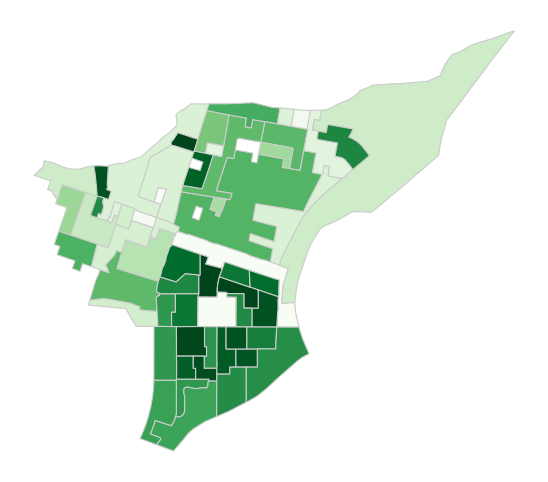

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
variable = '일별쓰레기배출량'

# Plot 생성
fig, ax = plt.subplots(1, figsize=(10, 6))

# GeoDataFrame을 시각화, legend=False로 기본 범례 제거
bm1_filter_gdf.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, alpha=1)
bm2_filter_gdf.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, alpha=1)

# 축 제거
ax.axis('off')

# 지도 저장
plt.savefig("/content/drive/MyDrive/시각화파일/bongmyung_block.png", dpi=800, bbox_inches='tight', pad_inches=0)

# 지도 출력
plt.show()

In [ ]:
# CSV 파일 경로
file_path_ = '/content/drive/MyDrive/유성구 데이터/유성구_공동주택_현황_위경도.csv'

# CSV 파일 읽기
apart_df = pd.read_csv(file_path_)

# 데이터프레임 확인
apart_df

,NAME,ADDRESS,_X,_Y
0,원자력연료사원아파트,대전광역시 유성구 도룡동 392-2,127.375911,36.384128
1,우성아파트,대전광역시 유성구 도룡동 383-3,127.381123,36.388177
2,연구원 현대아파트,대전광역시 유성구 도룡동 431-6,127.376720,36.383006
3,과기원교수아파트,대전광역시 유성구 도룡동 383-2,127.380333,36.388100
4,삼정하이츠아파트,대전광역시 유성구 구암동 600-2,127.331722,36.353420
...,...,...,...,...
244,호반써밋유성그랜드파크1단지,대전광역시 유성구 용산동 371-4,127.391040,36.416978
245,호반써밋유성그랜드파크3단지,대전광역시 유성구 용산동 391-2,127.395640,36.413690
246,원플러스(One Plus),대전광역시 유성구 봉명동 666-3,127.351980,36.358377
247,크레타하임,대전광역시 유성구 도룡동 385-21,127.379677,36.385815


In [ ]:
# 'ADDRESS' 열에 '관평동'이 포함된 행만 필터링
bongmyung_apart_df = apart_df[apart_df['ADDRESS'].str.contains('봉명동')]

# 필터링된 데이터프레임을 새로운 변수에 저장
bongmyung_apart_df

,NAME,ADDRESS,_X,_Y
60,예성그랑필리체,대전광역시 유성구 봉명동 611-1,127.344589,36.359389
61,위드리버,대전광역시 유성구 봉명동 678-4,127.353084,36.357120
62,노블레스 Ⅱ,대전광역시 유성구 봉명동 692-1,127.350584,36.356933
65,노블레스 Ⅲ,대전광역시 유성구 봉명동 640-8,127.349602,36.358788
78,온천훼미리타운,대전광역시 유성구 봉명동 441-11,127.340487,36.356356
...,...,...,...,...
231,휴안팰리스,대전광역시 유성구 봉명동 562-6,127.335355,36.356200
235,모나빌 3,대전광역시 유성구 봉명동 675-5,127.350411,36.357808
237,레자미탐앤탐,대전광역시 유성구 봉명동 621-2,127.346196,36.358741
246,원플러스(One Plus),대전광역시 유성구 봉명동 666-3,127.351980,36.358377


In [ ]:
import folium
from folium import Choropleth, LayerControl, GeoJson
import pandas as pd
import geopandas as gpd

# 법정동별 상권 수 집계

# 지도 중심부 설정 (대전 유성구)
center = [36.3668, 127.3451]

# 기본 지도 생성
m = folium.Map(location=center, zoom_start=12, tiles='CartoDB positron')

# Choropleth 레이어 추가
Choropleth(
    geo_data=bm1_filter_gdf.to_json(),
    data=bm1_filter_gdf,
    columns=['집계구번호', '일별쓰레기배출량'],
    key_on='feature.properties.집계구번호',
    fill_color='Greens',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='값',

).add_to(m)

Choropleth(
    geo_data=bm2_filter_gdf.to_json(),
    data=bm2_filter_gdf,
    columns=['집계구번호', '일별쓰레기배출량'],
    key_on='feature.properties.집계구번호',
    fill_color='Greens',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='값',

).add_to(m)

for _, row in bongmyung_apart_df.iterrows():
    folium.Circle(
        location=[row['_Y'], row['_X']],
        radius=100,  # 반경 설정 (미터 단위)
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.2,
        tooltip=f"주소: {row['ADDRESS']}"  # 마커에 표시될 툴팁
    ).add_to(m)

# 레이어 컨트롤 추가
LayerControl().add_to(m)

# 지도 저장 및 출력
m.save('/content/drive/MyDrive/시각화파일/html법정동별 지도/bongmyung_block1.html')
m